In [33]:
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn

In [5]:
df = pd.read_csv( 'data5/kmean.csv', index_col='Unnamed: 0' )
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


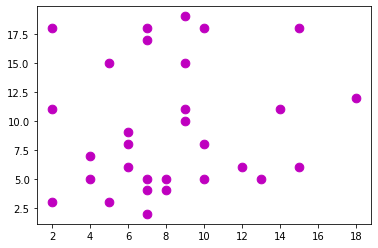

In [7]:
plt.scatter( df['x'], df['y'], s=75,c='m')
plt.show()

In [9]:
k = KMeans( n_clusters=4 )
km = k.fit( df )
type(km)

sklearn.cluster._kmeans.KMeans

In [12]:
cen = km.cluster_centers_
cen

array([[ 5.53846154,  5.53846154],
       [ 7.        , 17.14285714],
       [11.14285714,  7.28571429],
       [15.66666667, 13.66666667]])

In [24]:
df['label'] = km.labels_

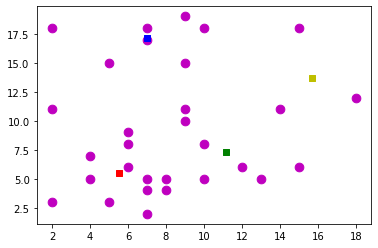

In [19]:
plt.scatter( df['x'], df['y'], s=75,c='m')
plt.scatter( cen[:,0], cen[:,1], marker='s', c=['r','b','g','y'])
plt.show()

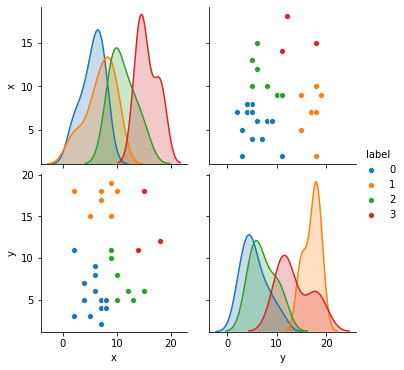

In [25]:

sb.pairplot( df, hue='label' )
plt.show()

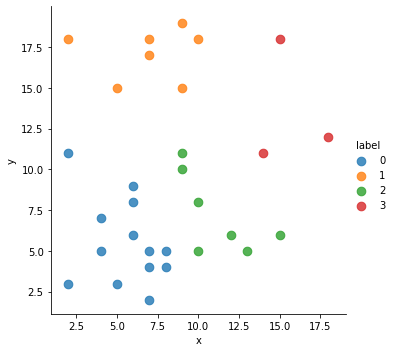

In [31]:
sb.lmplot( x='x', y='y', data=df, fit_reg=False, hue='label', scatter_kws={'s':75} ) 
# fir_reg = True : 회귀선을 그려줌.
plt.show()

- iris data set을 이용하여 최적의 분류 개수(n_cluster)를 찾고 K-means로 군집 분석을 수행하시오.

In [39]:
iris         = load_iris()
df           = pd.DataFrame( iris.data )
df.columns   = iris.feature_names
df['specis'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


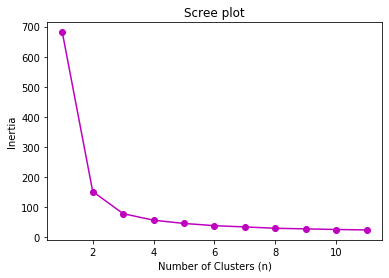

In [54]:
num_clusters = list(range(1, 12))	
inertias     = []

for i in num_clusters:
    k_model = KMeans( n_clusters=i )
    k_model.fit( iris.data )
    inertias.append(k_model.inertia_)   # k_model.inertia_ : 각 센터를 중심으로 떨어진 거리의 총합값의 평균.

plt.plot( num_clusters, inertias, '-mo' )
plt.title('Scree plot')
plt.xlabel('Number of Clusters (n)'); plt.ylabel('Inertia')
plt.show()

In [59]:
k_model = KMeans( n_clusters=3 )
k_model.fit( df ).cluster_centers_

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

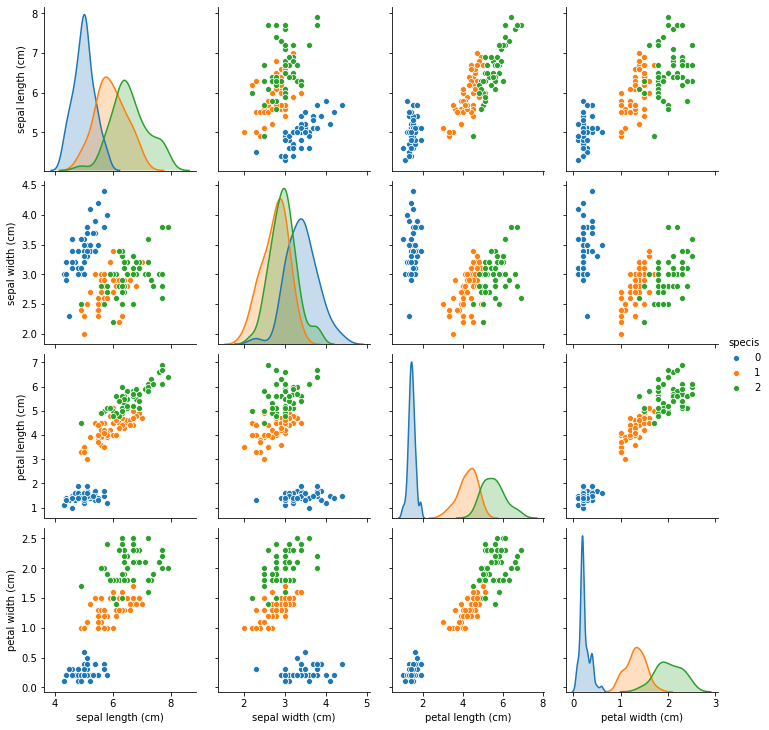

In [40]:
sb.pairplot( df, hue='specis' )
plt.show()